In [124]:
___Author___='LumberJack Jyss'

https://www.quantinsti.com/blog/random-forest-algorithm-in-python

In [125]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns
sns.set(palette='bright',style='whitegrid')
import numpy as np
import pandas as pd
import quandl
import pandas_datareader as web
from statsmodels.tsa.stattools import coint
import statsmodels
from statsmodels.tsa.stattools import adfuller
import itertools
import scipy
from scipy import stats
import time
from matplotlib.backends.backend_pdf import PdfPages
import warnings
warnings.filterwarnings('ignore')

In [126]:
start = pd.to_datetime('2016-03-31')
end = pd.to_datetime('2019-03-19')

In [127]:
data = web.DataReader('AMZN','yahoo',start,end)
spy_etf = web.DataReader('SPY','yahoo',start,end)
cpi = web.DataReader('CPI','yahoo',start,end)
pmi = web.DataReader('PMIDX','yahoo',start,end)
tlt = web.DataReader('TLT','yahoo',start,end)
eur = web.DataReader('EUR','yahoo',start,end)


data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-13,1700.000000,1679.349976,1683.000000,1690.810059,3552000,1690.810059
2019-03-14,1702.000000,1684.339966,1691.199951,1686.219971,2946600,1686.219971
2019-03-15,1718.800049,1693.130005,1703.000000,1712.359985,7550900,1712.359985
2019-03-18,1750.000000,1712.630005,1712.699951,1742.150024,5429100,1742.150024
2019-03-19,1784.160034,1753.510010,1753.510010,1761.849976,6364200,1761.849976


In [128]:
spy_etf.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-03-31,206.410004,205.330002,205.910004,205.520004,94584100.0,193.828278
2016-04-01,207.139999,203.979996,204.350006,206.919998,114423500.0,195.148621
2016-04-04,207.070007,205.889999,206.830002,206.250000,63497000.0,194.516769
2016-04-05,206.259995,203.889999,204.669998,204.190002,99662200.0,192.573914
2016-04-06,206.490005,203.979996,204.190002,206.419998,89889800.0,194.677063


In [129]:
dataset = pd.DataFrame()
dataset['Adj Close'] = data['Adj Close'].shift(1)
dataset['SPY'] = spy_etf['Adj Close']
#dataset['SPY'] = dataset['SPY'].iloc[:-1,1]
#index =range(0,len(dataset))
#index = np.array(index)
#dataset.set_index(keys = index, inplace = True)
#dataset = dataset.to_frame()
#dataset['Date'] = dataset.index.strftime('%Y,%M,%D')
#cols = dataset.columns.tolist()
#cols = cols[-1:] + cols[:-1]
#dataset = dataset[cols]
dataset.tail()

,Adj Close,SPY
Date,,
2019-03-13,1673.099976,280.106201
2019-03-14,1690.810059,279.927002
2019-03-15,1686.219971,281.309998
2019-03-18,1712.359985,282.329987
2019-03-19,1742.150024,282.399994


In [130]:
dataset.head()

,Adj Close,SPY
Date,,
2016-03-31,NaN,193.828278
2016-04-01,593.640015,195.148621
2016-04-04,598.500000,194.516769
2016-04-05,593.190002,192.573914
2016-04-06,586.140015,194.677063


In [131]:
X = dataset.iloc[1:, 1].to_frame().dropna()
y = dataset.iloc[1:, 0].to_frame().dropna()

In [132]:
len(X)

746

In [133]:
len(y)

746

In [134]:
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0, test_size = 0.25)

In [135]:
y.head()

,Adj Close
Date,
2016-04-01,593.640015
2016-04-04,598.500000
2016-04-05,593.190002
2016-04-06,586.140015
2016-04-07,602.080017


In [136]:
linearRegression = LinearRegression()
linearRegression.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [137]:
print("Training Score: {:.2f}".format(linearRegression.score(train_X, train_y)*100),'%')
print("Testing Score: {:.2f}".format(linearRegression.score(test_X, test_y)*100),'%')

Training Score: 87.36 %
Testing Score: 86.55 %


Text(0.5, 1.0, 'Correlation between AMZN & SPY (Training Data)')

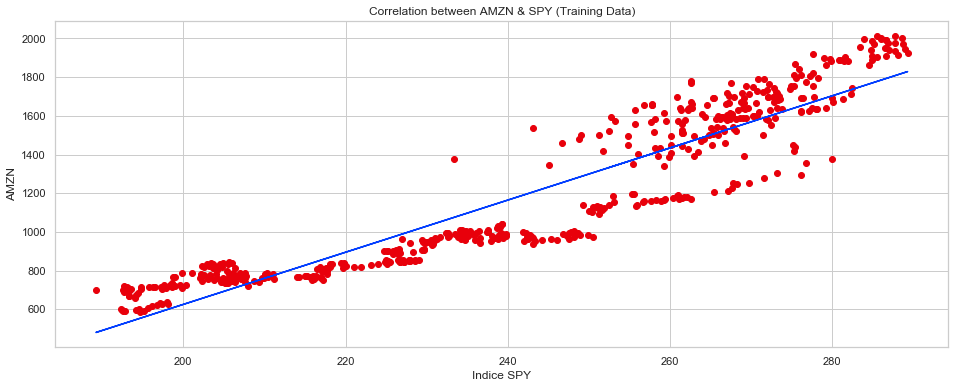

In [138]:
plt.figure(figsize = (16, 6))
plt.scatter(train_X, train_y, color = 'r')
plt.plot(train_X, linearRegression.predict(train_X), color = 'b')
plt.xlabel('Indice SPY')
plt.ylabel('AMZN')
plt.title('Correlation between AMZN & SPY (Training Data)')

Text(0.5, 1.0, 'Correlation between AMZN & SPY (Testing Data)')

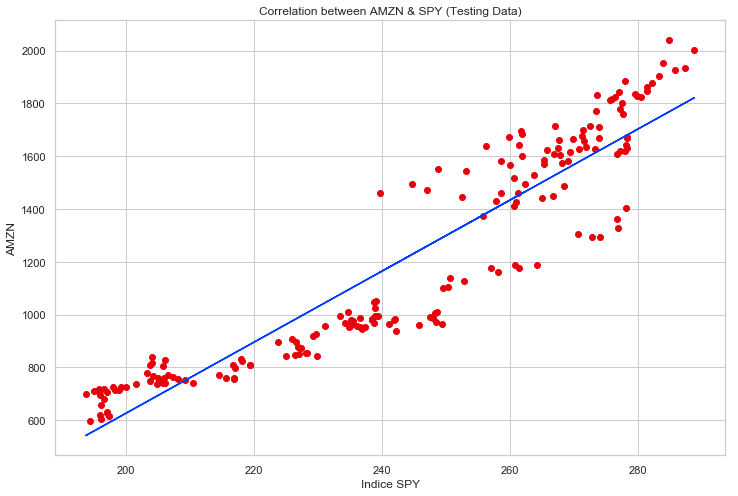

In [139]:
plt.figure(figsize = (12, 8))
plt.scatter(test_X, test_y, color = 'r')
plt.plot(test_X, linearRegression.predict(test_X), color = 'b')
plt.xlabel('Indice SPY')
plt.ylabel('AMZN')
plt.title('Correlation between AMZN & SPY (Testing Data)')

## Multiple Lnear Regression

In [140]:
dataset['cpi'] = cpi['Adj Close']
dataset['pmi'] = pmi['Adj Close']
dataset['tlt'] = tlt['Adj Close']

dataset.tail()

,Adj Close,SPY,cpi,pmi,tlt
Date,,,,,
2019-03-13,1673.099976,280.106201,27.520000,10.01,121.830002
2019-03-14,1690.810059,279.927002,27.530001,10.00,120.949997
2019-03-15,1686.219971,281.309998,27.520000,10.03,121.750000
2019-03-18,1712.359985,282.329987,27.559999,10.07,121.680000
2019-03-19,1742.150024,282.399994,27.570000,10.06,121.410004


In [141]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 747 entries, 2016-03-31 to 2019-03-19
Data columns (total 5 columns):
Adj Close    746 non-null float64
SPY          747 non-null float64
cpi          747 non-null float64
pmi          745 non-null float64
tlt          747 non-null float64
dtypes: float64(5)
memory usage: 35.0 KB


In [142]:
X = dataset.iloc[:,1:].dropna()
y = dataset.iloc[:, 0].to_frame().dropna()

In [143]:
X.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 745 entries, 2016-03-31 to 2019-03-19
Data columns (total 4 columns):
SPY    745 non-null float64
cpi    745 non-null float64
pmi    745 non-null float64
tlt    745 non-null float64
dtypes: float64(4)
memory usage: 29.1 KB


In [144]:
y.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 746 entries, 2016-04-01 to 2019-03-19
Data columns (total 1 columns):
Adj Close    746 non-null float64
dtypes: float64(1)
memory usage: 11.7 KB


In [145]:
standardScaler = StandardScaler()
train_X = standardScaler.fit_transform(train_X)
test_X = standardScaler.transform(test_X)

In [146]:
linearRegression = LinearRegression()
linearRegression.fit(train_X, train_y)
print("Training Score: {0:.2f}".format(linearRegression.score(train_X, train_y)*100),'%')
print("Testing Score: {0:.2f}".format(linearRegression.score(test_X, test_y)*100),'%')

Training Score: 87.36 %
Testing Score: 86.55 %


### DEEP LEARNIG

https://medium.com/mlreview/a-simple-deep-learning-model-for-stock-price-prediction-using-tensorflow-30505541d877

In [147]:
print ('X head: \n',X.head(),'\n')
print ('y head: \n',y.head(),'\n')
print ('X tail: \n',X.tail(),'\n')
print ('y tail: \n',y.tail(),'\n')

X head: 
                    SPY        cpi       pmi         tlt
Date                                                   
2016-03-31  193.828278  26.104795  8.275249  121.034134
2016-04-01  195.148621  26.055967  8.308350  121.349808
2016-04-05  192.573914  25.968071  8.175945  122.752037
2016-04-06  194.677063  25.968071  8.217321  121.860588
2016-04-07  192.347565  25.938772  8.134570  123.364914 

y head: 
              Adj Close
Date                  
2016-04-01  593.640015
2016-04-04  598.500000
2016-04-05  593.190002
2016-04-06  586.140015
2016-04-07  602.080017 

X tail: 
                    SPY        cpi    pmi         tlt
Date                                                
2019-03-13  280.106201  27.520000  10.01  121.830002
2019-03-14  279.927002  27.530001  10.00  120.949997
2019-03-15  281.309998  27.520000  10.03  121.750000
2019-03-18  282.329987  27.559999  10.07  121.680000
2019-03-19  282.399994  27.570000  10.06  121.410004 

y tail: 
               Adj Close
Date  

In [148]:
print ('\nInfos X : \n')
print (X.info(),'\n')


Infos X : 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 745 entries, 2016-03-31 to 2019-03-19
Data columns (total 4 columns):
SPY    745 non-null float64
cpi    745 non-null float64
pmi    745 non-null float64
tlt    745 non-null float64
dtypes: float64(4)
memory usage: 29.1 KB
None 



In [149]:
print ('\nInfos y : \n')
print(y.info(),'\n')


Infos y : 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 746 entries, 2016-04-01 to 2019-03-19
Data columns (total 1 columns):
Adj Close    746 non-null float64
dtypes: float64(1)
memory usage: 11.7 KB
None 



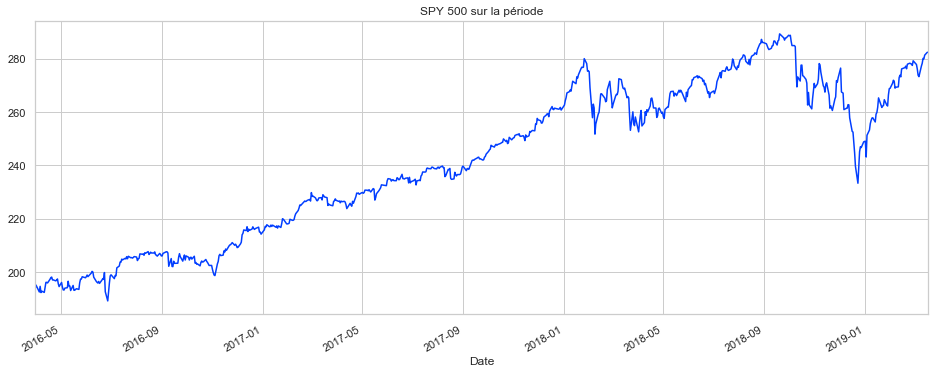

In [150]:
X['SPY'].plot(figsize=(16,6),title='SPY 500 sur la période')

In [151]:
# Dimensions of dataset sur 2 colonnes
X.dropna()
y.dropna()
n = X.shape[0]
p = y.shape[0]
print('La valeur de n (shape de X) est de : ',n)
print('La valeur de p (shape de y) est de : ',p)

La valeur de n (shape de X) est de :  745
La valeur de p (shape de y) est de :  746


In [152]:
X = X.values
y = y.values

In [153]:
# Training and test data
train_start = 0
train_end = int(np.floor(0.8*n))
test_start = train_end
test_end = n
X_train = X[np.arange(train_start, train_end), :]
X_test = X[np.arange(test_start, test_end), :]
y_train = y[np.arange(train_start, train_end), :]
y_test = y[np.arange(test_start, test_end), :]

In [154]:
# Scale data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

In [155]:
# Initialize the graph
graph = tf.Session()

In [156]:
# Placeholder
X = tf.placeholder(dtype=tf.float32, shape=[None, 4])
Y = tf.placeholder(dtype=tf.float32, shape=[None,1])

In [157]:
# Initializers
sigma = 1
weight_initializer = tf.variance_scaling_initializer(mode="fan_avg", distribution="uniform", scale=sigma)
bias_initializer = tf.zeros_initializer()

In [206]:
# Model architecture parameters
n_stocks = 4 # Nb of columns
n_neurons_1 = 2048
n_neurons_2 = 1024
n_neurons_3 = 512
n_neurons_4 = 256
n_neurons_5 = 128
n_target = 1

# Layer 1: Variables for hidden weights and biases
W_hidden_1 = tf.Variable(weight_initializer([n_stocks, n_neurons_1]))
bias_hidden_1 = tf.Variable(bias_initializer([n_neurons_1]))
# Layer 2: Variables for hidden weights and biases
W_hidden_2 = tf.Variable(weight_initializer([n_neurons_1, n_neurons_2]))
bias_hidden_2 = tf.Variable(bias_initializer([n_neurons_2]))
# Layer 3: Variables for hidden weights and biases
W_hidden_3 = tf.Variable(weight_initializer([n_neurons_2, n_neurons_3]))
bias_hidden_3 = tf.Variable(bias_initializer([n_neurons_3]))
# Layer 4: Variables for hidden weights and biases
W_hidden_4 = tf.Variable(weight_initializer([n_neurons_3, n_neurons_4]))
bias_hidden_4 = tf.Variable(bias_initializer([n_neurons_4]))
# Layer 5: Variables for hidden weights and biases
W_hidden_5 = tf.Variable(weight_initializer([n_neurons_4, n_neurons_5]))
bias_hidden_5 = tf.Variable(bias_initializer([n_neurons_5]))

# Output layer: Variables for output weights and biases
W_out = tf.Variable(weight_initializer([n_neurons_5, n_target]))
bias_out = tf.Variable(bias_initializer([n_target]))

In [207]:
# Hidden layer
hidden_1 = tf.nn.relu(tf.add(tf.matmul(X, W_hidden_1), bias_hidden_1))
hidden_2 = tf.nn.relu(tf.add(tf.matmul(hidden_1, W_hidden_2), bias_hidden_2))
hidden_3 = tf.nn.relu(tf.add(tf.matmul(hidden_2, W_hidden_3), bias_hidden_3))
hidden_4 = tf.nn.relu(tf.add(tf.matmul(hidden_3, W_hidden_4), bias_hidden_4))
hidden_5 = tf.nn.relu(tf.add(tf.matmul(hidden_4, W_hidden_5), bias_hidden_5))

# Output layer (must be transposed)
out = tf.transpose(tf.add(tf.matmul(hidden_5, W_out), bias_out))

In [208]:
# Cost function
mse = tf.reduce_mean(tf.squared_difference(out, Y))

In [209]:
# Optimizer
opt = tf.train.AdamOptimizer().minimize(mse)

No handles with labels found to put in legend.


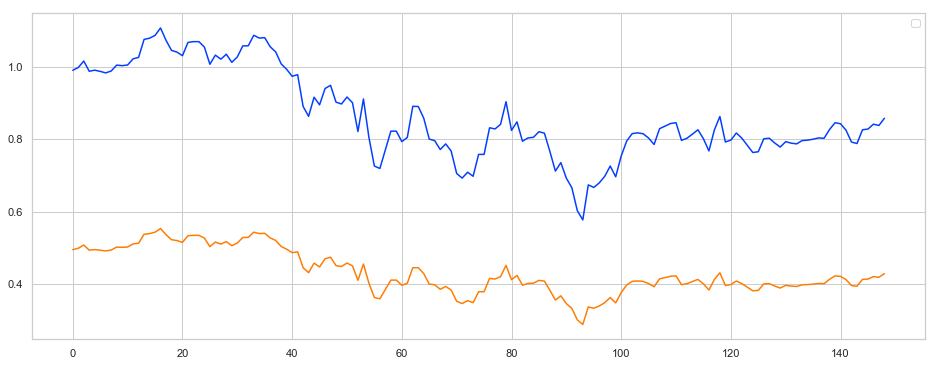

In [233]:
# Make Session
net = tf.Session()
# Run initializer
net.run(tf.global_variables_initializer())

# Setup interactive plot
plt.ion()
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test)
line2, = ax1.plot(y_test*0.5)
plt.legend()
#plt.show()

# Number of epochs and batch size
epochs = 200
batch_size = 745

for e in range(epochs):

    # Shuffle training data
    shuffle_indices = np.random.permutation(np.arange(len(y_train)))
    X_train = X_train[shuffle_indices]
    y_train = y_train[shuffle_indices]

    # Minibatch training
    for i in range(0, len(y_train) // batch_size):
        start = i * batch_size
        batch_x = X_train[start:start + batch_size]
        batch_y = y_train[start:start + batch_size]
        # Run optimizer with batch
        net.run(opt, feed_dict={X: batch_x, Y: batch_y})

        # Show progress
        if np.mod(i, 5) == 0:
            # Prediction
            pred = net.run(out, feed_dict={X: X_test})
            line2.set_ydata(pred)
            plt.title('Epoch ' + str(e) + ', Batch ' + str(i))
            #file_name = 'img/epoch_' + str(e) + '_batch_' + str(i) + '.jpg'
            #plt.savefig(file_name)
            plt.pause(0.01)
# Print final MSE after Training

In [234]:
mse_final = net.run(mse, feed_dict={X: X_test, Y: y_test})

In [235]:
print(mse_final*100,'%')

74.1220772266388 %


In [229]:
mse

<tf.Tensor 'Mean_4:0' shape=() dtype=float32>